In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df_bops_bm = pd.read_csv('bops_bm.csv')
df_bops_online = pd.read_csv('bops_online.csv')

In [3]:
df_bops_bm = df_bops_bm.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'], axis=1)
df_bops_bm

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,"118,691"
1,1.0,2011.0,4.0,17.0,0.0,0.0,"113,804"
2,1.0,2011.0,4.0,18.0,0.0,0.0,"172,104"
3,1.0,2011.0,5.0,19.0,0.0,0.0,"105,591"
4,1.0,2011.0,5.0,20.0,0.0,0.0,"94,884"
...,...,...,...,...,...,...,...
4533,169.0,2012.0,3.0,14.0,1.0,1.0,"67,671"
4534,169.0,2012.0,4.0,15.0,1.0,1.0,"50,140"
4535,169.0,2012.0,4.0,16.0,1.0,1.0,"75,023"
4536,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_bops_online = df_bops_online.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'], axis=1)
df_bops_online

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,"18,564"
1,1,2011,4,18,0,1,"30,883"
2,1,2011,5,19,0,1,"37,425"
3,1,2011,5,20,0,1,"32,563"
4,1,2011,5,21,0,1,"35,773"
...,...,...,...,...,...,...,...
10705,210,2012,2,10,1,0,"9,357"
10706,210,2012,3,11,1,0,"3,013"
10707,210,2012,3,12,1,0,"3,155"
10708,210,2012,3,13,1,0,"2,925"


In [5]:
# Vemos si hay más datos vacíos y borramos
df_bops_bm.loc[df_bops_bm['id (store)'].isnull()]

,id (store),year,month,week,usa,after,sales
4536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_bops_bm.drop(4537, inplace=True)
df_bops_bm.drop(4536, inplace=True)

In [7]:
df_bops_online.loc[df_bops_online['id (DMA)'].isnull()]

,id (DMA),year,month,week,after,close,sales


In [8]:
# Renombramos las columnas pues la de ventas vien con un espacio al final
df_bops_bm.rename(columns={'id (store)':'id (store)',
                          'year':'year',
                          'month':'month',
                          'usa':'usa',
                          'after':'after',  
                          ' sales ':'sales'}, 
                 inplace=True)

df_bops_bm

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,"118,691"
1,1.0,2011.0,4.0,17.0,0.0,0.0,"113,804"
2,1.0,2011.0,4.0,18.0,0.0,0.0,"172,104"
3,1.0,2011.0,5.0,19.0,0.0,0.0,"105,591"
4,1.0,2011.0,5.0,20.0,0.0,0.0,"94,884"
...,...,...,...,...,...,...,...
4531,169.0,2012.0,3.0,12.0,1.0,1.0,"56,331"
4532,169.0,2012.0,3.0,13.0,1.0,1.0,"74,388"
4533,169.0,2012.0,3.0,14.0,1.0,1.0,"67,671"
4534,169.0,2012.0,4.0,15.0,1.0,1.0,"50,140"


In [9]:
df_bops_online.rename(columns={'id (DMA)':'id (DMA)',
                          'year':'year',
                          'month':'month',
                          'usa':'usa',
                          'after':'after',  
                          ' sales ':'sales'}, 
                 inplace=True)

In [10]:
# Hay que limpiar esta columna, pues viene como caracter
df_bops_bm['sales'] = df_bops_bm['sales'].str.replace(',', '')
df_bops_bm['sales'] = df_bops_bm['sales'].astype(int)
df_bops_bm

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,118691
1,1.0,2011.0,4.0,17.0,0.0,0.0,113804
2,1.0,2011.0,4.0,18.0,0.0,0.0,172104
3,1.0,2011.0,5.0,19.0,0.0,0.0,105591
4,1.0,2011.0,5.0,20.0,0.0,0.0,94884
...,...,...,...,...,...,...,...
4531,169.0,2012.0,3.0,12.0,1.0,1.0,56331
4532,169.0,2012.0,3.0,13.0,1.0,1.0,74388
4533,169.0,2012.0,3.0,14.0,1.0,1.0,67671
4534,169.0,2012.0,4.0,15.0,1.0,1.0,50140


In [11]:
# Hay que limpiar esta columna, pues viene como caracter
df_bops_online['sales'] = df_bops_online['sales'].str.replace(',', '')
df_bops_online['sales'] = df_bops_online['sales'].astype(int)
df_bops_online

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,18564
1,1,2011,4,18,0,1,30883
2,1,2011,5,19,0,1,37425
3,1,2011,5,20,0,1,32563
4,1,2011,5,21,0,1,35773
...,...,...,...,...,...,...,...
10705,210,2012,2,10,1,0,9357
10706,210,2012,3,11,1,0,3013
10707,210,2012,3,12,1,0,3155
10708,210,2012,3,13,1,0,2925


In [12]:
df_bops_bm_aux=df_bops_bm.copy()
df_bops_bm_aux

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,118691
1,1.0,2011.0,4.0,17.0,0.0,0.0,113804
2,1.0,2011.0,4.0,18.0,0.0,0.0,172104
3,1.0,2011.0,5.0,19.0,0.0,0.0,105591
4,1.0,2011.0,5.0,20.0,0.0,0.0,94884
...,...,...,...,...,...,...,...
4531,169.0,2012.0,3.0,12.0,1.0,1.0,56331
4532,169.0,2012.0,3.0,13.0,1.0,1.0,74388
4533,169.0,2012.0,3.0,14.0,1.0,1.0,67671
4534,169.0,2012.0,4.0,15.0,1.0,1.0,50140


In [13]:
df_bops_online_aux=df_bops_online.copy()
df_bops_online_aux

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,18564
1,1,2011,4,18,0,1,30883
2,1,2011,5,19,0,1,37425
3,1,2011,5,20,0,1,32563
4,1,2011,5,21,0,1,35773
...,...,...,...,...,...,...,...
10705,210,2012,2,10,1,0,9357
10706,210,2012,3,11,1,0,3013
10707,210,2012,3,12,1,0,3155
10708,210,2012,3,13,1,0,2925


Me parece que lo primero que hay que hacer es hacer un análisis en torno al antes y después de la puesta en producción de programa BOPS, esto con la finalidad de tratar de descartar desde un principio el peor escenario que sería que a partir de BOPS, hubo una reducción en las ventas.

In [14]:
df_bops_bm_aux.drop(['id (store)','after','usa'], axis=1, inplace=True)
df_bops_bm_aux=df_bops_bm_aux.groupby(['year','month','week']).sum()
df_bops_bm_aux=df_bops_bm_aux.reset_index()
df_bops_bm_aux.astype(float)
df_bops_bm_aux['aux']=df_bops_bm_aux.index.to_list()
df_bops_bm_aux

,year,month,week,sales,aux
0,2011.0,4.0,16.0,5101160,0
1,2011.0,4.0,17.0,4537169,1
2,2011.0,4.0,18.0,6028916,2
3,2011.0,5.0,19.0,5547761,3
4,2011.0,5.0,20.0,6057821,4
5,2011.0,5.0,21.0,5847327,5
6,2011.0,5.0,22.0,5688157,6
7,2011.0,5.0,23.0,5955700,7
8,2011.0,6.0,24.0,5617094,8
9,2011.0,6.0,25.0,6680281,9


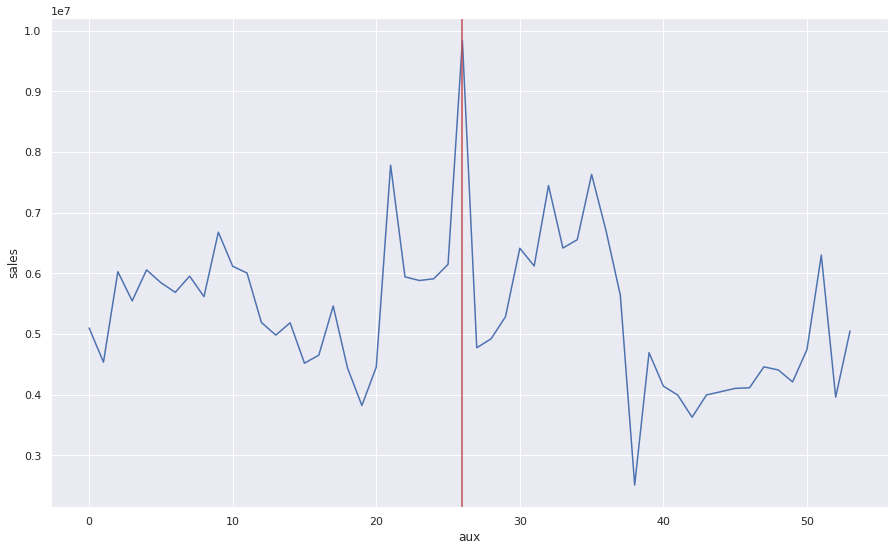

In [15]:
sb.set(style="darkgrid")
sb.set(rc={'figure.figsize':(15,9)})

sb.lineplot(x="aux", y="sales", data=df_bops_bm_aux, ci=None)
plt.axvline(26, 0,1.17, color='r')

La línea roja representa el punto en el tiempo en el que se implementó el programa BOPS. En general, me parece que las ventas ya iban hacia la baja, y el despunte que tuvieron con BOPS, posiblemente se haya debido a alguna campaña de promoción, ya sea por alguna oferta o simplemente porque era novedad. La caída más fuerte que se aprecia, es cercana al índice 37 o 38 de la columna que agregamos, y si vamos al dataframe para ver qué época del año es, se trata de la última semana de año. Siendo que en las épocas decembrinas es muy común salir de viaje, la baja de ventas no debería resultar tan sorprendente, desafortunadamente no contamos con mayor historia para ver el comportamiento de un año antes como para afirmar que se trata de algo cíclico. Por otra parte tanto el inicio y fin de la gráfica (que abarca el periodo de un año) empieza y termina justo en el mismo punto de ventas (.5), lo que podría apoyar la idea de ser un comportamiento que se repite.

In [16]:
df_bops_bm_aux=df_bops_bm.copy()
df_bops_bm_aux

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,118691
1,1.0,2011.0,4.0,17.0,0.0,0.0,113804
2,1.0,2011.0,4.0,18.0,0.0,0.0,172104
3,1.0,2011.0,5.0,19.0,0.0,0.0,105591
4,1.0,2011.0,5.0,20.0,0.0,0.0,94884
...,...,...,...,...,...,...,...
4531,169.0,2012.0,3.0,12.0,1.0,1.0,56331
4532,169.0,2012.0,3.0,13.0,1.0,1.0,74388
4533,169.0,2012.0,3.0,14.0,1.0,1.0,67671
4534,169.0,2012.0,4.0,15.0,1.0,1.0,50140


In [17]:
df_bops_bm_aux.drop(['id (store)','after'], axis=1, inplace=True)
df_bops_bm_aux=df_bops_bm_aux.groupby(['year','month','week','usa']).sum()
df_bops_bm_aux=df_bops_bm_aux.reset_index()
df_bops_bm_aux.astype(float)
df_bops_bm_aux['aux']=df_bops_bm_aux.index.to_list()
df_bops_bm_aux

,year,month,week,usa,sales,aux
0,2011.0,4.0,16.0,0.0,1042705,0
1,2011.0,4.0,16.0,1.0,4058455,1
2,2011.0,4.0,17.0,0.0,953903,2
3,2011.0,4.0,17.0,1.0,3583266,3
4,2011.0,4.0,18.0,0.0,1227311,4
...,...,...,...,...,...,...
103,2012.0,3.0,14.0,1.0,5089637,103
104,2012.0,4.0,15.0,0.0,690379,104
105,2012.0,4.0,15.0,1.0,3270728,105
106,2012.0,4.0,16.0,0.0,947411,106


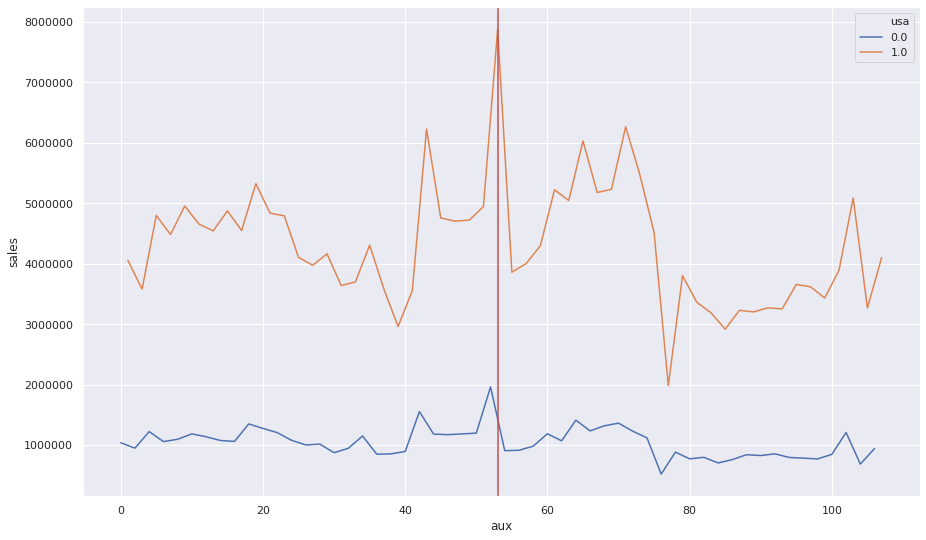

In [18]:
sb.set(style="darkgrid")
sb.set(rc={'figure.figsize':(15,9)})

sb.lineplot(x="aux", y="sales", hue='usa', data=df_bops_bm_aux, ci=None)
plt.axvline(53, 0,1.17, color='r')

Esta gráfica me parece muy interesante. Tanto la línea de negocios de Estados Unidos como Canadá, tienen un comportamiento similar, pero es notorio que el mercado Canadiense es un poco más estable, además de que el rango de ventas está más acotado; por otra parte en Estados Unidos, el rango de ventas es mucho mayor, pero menos estable. Al igual que en la gráfica anteior, se puede ver que el punto donde inicia y termina las ventas de Canadá para los registros con los que contamos, es el mismo (1000000).

Ahora analizaremos el dataframe online

In [19]:
df_bops_online_aux.drop(['id (DMA)','after','close'], axis=1, inplace=True)
df_bops_online_aux=df_bops_online_aux.groupby(['year','month','week']).sum()
df_bops_online_aux=df_bops_online_aux.reset_index()
df_bops_online_aux.astype(float)
df_bops_online_aux['aux']=df_bops_online_aux.index.to_list()
df_bops_online_aux

,year,month,week,sales,aux
0,2011,4,17,3031382,0
1,2011,4,18,3184999,1
2,2011,5,19,3503112,2
3,2011,5,20,3394319,3
4,2011,5,21,3734255,4
5,2011,5,22,3135038,5
6,2011,5,23,3425560,6
7,2011,6,24,3276717,7
8,2011,6,25,3436992,8
9,2011,6,26,3267897,9


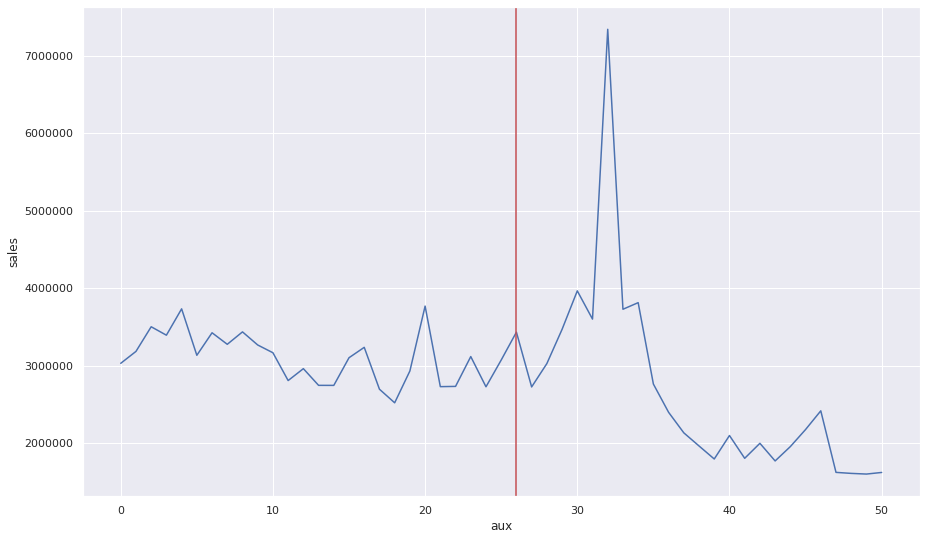

In [20]:
sb.set(style="darkgrid")
sb.set(rc={'figure.figsize':(15,9)})

sb.lineplot(x="aux", y="sales", data=df_bops_online_aux, ci=None)
plt.axvline(26, 0,1.17, color='r')

La información del sitio onlie, muestra de manera general una tendencia a la baja (a exepción de un gran despunte cercano a nuestro índice 33 (que en el calendario representaría priincipios de diciembre, podría intepretarse como la compensacón que de la caída que tiene el lugar físico a finales de diciembre, y podría explicarse como que las personas hacen sus compras de fin de año desde casa y con anticipación para poder salir de vacaciones). A diferencia de la tienda física, aquí no parece que se trate de algo cíclico, pues en el rango de tiempo que se muestra, el inicio empezó en una cantidad muho mayor a la final).

In [21]:
df_bops_online_aux=df_bops_online.copy()
df_bops_online_aux

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,18564
1,1,2011,4,18,0,1,30883
2,1,2011,5,19,0,1,37425
3,1,2011,5,20,0,1,32563
4,1,2011,5,21,0,1,35773
...,...,...,...,...,...,...,...
10705,210,2012,2,10,1,0,9357
10706,210,2012,3,11,1,0,3013
10707,210,2012,3,12,1,0,3155
10708,210,2012,3,13,1,0,2925


In [22]:
df_bops_online_aux.drop(['id (DMA)','after'], axis=1, inplace=True)
df_bops_online_aux=df_bops_online_aux.groupby(['year','month','week','close']).sum()
df_bops_online_aux=df_bops_online_aux.reset_index()
df_bops_online_aux.astype(float)
df_bops_online_aux['aux']=df_bops_online_aux.index.to_list()
df_bops_online_aux

,year,month,week,close,sales,aux
0,2011,4,17,0,1761262,0
1,2011,4,17,1,1270120,1
2,2011,4,18,0,1843675,2
3,2011,4,18,1,1341324,3
4,2011,5,19,0,1921952,4
...,...,...,...,...,...,...
97,2012,3,12,1,654872,97
98,2012,3,13,0,942156,98
99,2012,3,13,1,659834,99
100,2012,3,14,0,974581,100


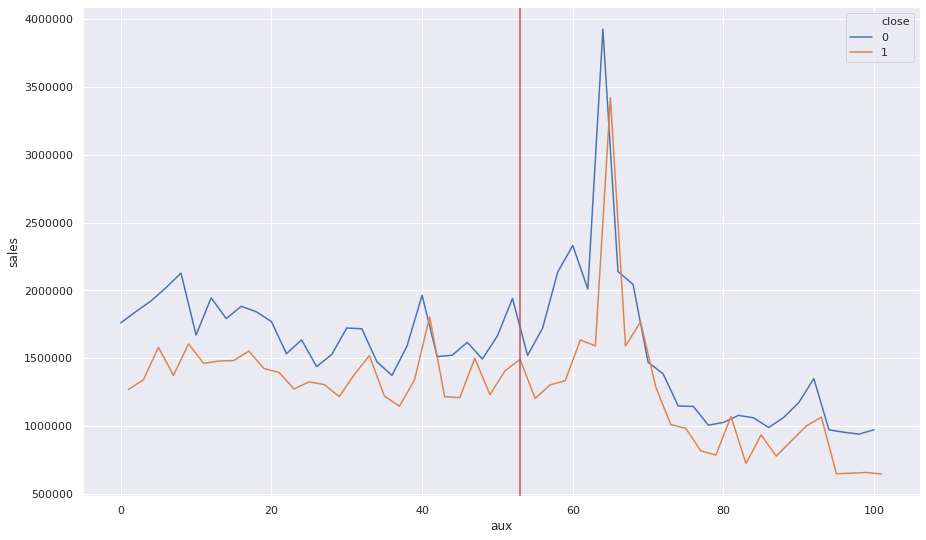

In [23]:
sb.set(style="darkgrid")
sb.set(rc={'figure.figsize':(15,9)})

sb.lineplot(x="aux", y="sales", hue='close', data=df_bops_online_aux, ci=None)
plt.axvline(53, 0,1.17, color='r')

Al plotear comparando los DMA´s cercanos y lejanos, encontramos algo que me parece muy interesante: pese a que las las altas y bajas ocurren en los mismos puntos, sus ventas online a hacia DMA's lejanos son considerablemente mayores a las de DMA's cercanos, lo cual podría ser interpretado como que hay gente interesada en el producto pero al no estar físicamete cerca, recurre a la modalidad online. Podría ser una señal de tener más presencia en otros lugares, como Canadá por ejemplo.

In [24]:
df_bops_bm_aux=df_bops_bm.copy()
df_bops_bm_aux

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,118691
1,1.0,2011.0,4.0,17.0,0.0,0.0,113804
2,1.0,2011.0,4.0,18.0,0.0,0.0,172104
3,1.0,2011.0,5.0,19.0,0.0,0.0,105591
4,1.0,2011.0,5.0,20.0,0.0,0.0,94884
...,...,...,...,...,...,...,...
4531,169.0,2012.0,3.0,12.0,1.0,1.0,56331
4532,169.0,2012.0,3.0,13.0,1.0,1.0,74388
4533,169.0,2012.0,3.0,14.0,1.0,1.0,67671
4534,169.0,2012.0,4.0,15.0,1.0,1.0,50140


In [25]:
df_bops_bm_aux.drop(['id (store)','usa','year','month','week'], axis=1, inplace=True)
df_bops_bm_aux=df_bops_bm_aux.groupby(['after']).sum()
df_bops_bm_aux=df_bops_bm_aux.reset_index()
df_bops_bm_aux.astype(float)
df_bops_bm_aux

,after,sales
0,0.0,153420472
1,1.0,136308894


Respecto a números duros, la diferencia en ventas en las tiendas físicas desde la implantación del programa BOPS fue de: $17,111,578 en contra. Esto no necesariamente es sinónimo de que el programa es el causante de la disminución. (De hecho podríamos considerarlo algo esperable, pues de las personas que consuman mediante la plataforma BOPS ese dinero está siendo contabilizado en el rubro online de la empresa

In [26]:
df_bops_online_aux=df_bops_online.copy()
df_bops_online_aux

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,18564
1,1,2011,4,18,0,1,30883
2,1,2011,5,19,0,1,37425
3,1,2011,5,20,0,1,32563
4,1,2011,5,21,0,1,35773
...,...,...,...,...,...,...,...
10705,210,2012,2,10,1,0,9357
10706,210,2012,3,11,1,0,3013
10707,210,2012,3,12,1,0,3155
10708,210,2012,3,13,1,0,2925


In [27]:
df_bops_online_aux.drop(['id (DMA)','close','year','month','week'], axis=1, inplace=True)
df_bops_online_aux=df_bops_online_aux.groupby(['after']).sum()
df_bops_online_aux=df_bops_online_aux.reset_index()
df_bops_online_aux.astype(float)
df_bops_online_aux

,after,sales
0,0,80468614
1,1,66854985


Mientras que en el sitio online se registró una una diferencia de $13,613,629 en contra desde la implementación del programa BOPS. De nuevo, no necesariamente la implementación del programa es el disparador de esta situación.

In [28]:
df_bops_bm_aux=df_bops_bm.copy()
df_bops_bm_aux

,id (store),year,month,week,usa,after,sales
0,1.0,2011.0,4.0,16.0,0.0,0.0,118691
1,1.0,2011.0,4.0,17.0,0.0,0.0,113804
2,1.0,2011.0,4.0,18.0,0.0,0.0,172104
3,1.0,2011.0,5.0,19.0,0.0,0.0,105591
4,1.0,2011.0,5.0,20.0,0.0,0.0,94884
...,...,...,...,...,...,...,...
4531,169.0,2012.0,3.0,12.0,1.0,1.0,56331
4532,169.0,2012.0,3.0,13.0,1.0,1.0,74388
4533,169.0,2012.0,3.0,14.0,1.0,1.0,67671
4534,169.0,2012.0,4.0,15.0,1.0,1.0,50140


In [29]:
df_bops_bm_aux.drop(['id (store)','year','month','week'], axis=1, inplace=True)
df_bops_bm_aux=df_bops_bm_aux.groupby(['usa','after']).sum()
df_bops_bm_aux=df_bops_bm_aux.reset_index()
df_bops_bm_aux.astype(float)
df_bops_bm_aux

,usa,after,sales
0,0.0,0.0,30689777
1,0.0,1.0,25853285
2,1.0,0.0,122730695
3,1.0,1.0,110455609


Al comparar las ventas antes y después de BOPS haciedo la separación por tiendas en Estados Unidos o Canadá, vemos que $4,836,492 fueron pérdidas en Canada, mientras que $12,275,086 fueron en Estados Unidos. En términos proporcionales muy generales, la pérdida fue similar para las cantidades que se venían manejando en cada país (de hecho esto se veía desde la gráfica de ventas por semana, por lo que no es nada nuevo.

In [30]:
df_bops_online_aux=df_bops_online.copy()
df_bops_online_aux

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,18564
1,1,2011,4,18,0,1,30883
2,1,2011,5,19,0,1,37425
3,1,2011,5,20,0,1,32563
4,1,2011,5,21,0,1,35773
...,...,...,...,...,...,...,...
10705,210,2012,2,10,1,0,9357
10706,210,2012,3,11,1,0,3013
10707,210,2012,3,12,1,0,3155
10708,210,2012,3,13,1,0,2925


In [31]:
df_bops_online_aux.drop(['id (DMA)','year','month','week'], axis=1, inplace=True)
df_bops_online_aux=df_bops_online_aux.groupby(['close','after']).sum()
df_bops_online_aux=df_bops_online_aux.reset_index()
df_bops_online_aux.astype(float)
df_bops_online_aux

,close,after,sales
0,0,0,44378032
1,0,1,37525951
2,1,0,36090582
3,1,1,29329034


### 1. ¿Deberían expandirse a Canadá?

Considero que es viable que estudien la opción de expandirse a Canadá, (independientemente de que deben analizar qué fue lo que sucedió con el BOPS). Esta afirmación la digo porque al momento de revisar los dataset, vi que la proporción de utilidades de Canadá respecto al número de tienda, es similar a los números de Estados Unidos sólo que a otra escala, (por cada tienda en Canadá hay 3 en USA, y por cada dolar de ganancia en Canadá, son 3 o 4 dólares de ganancia en USA aprox). Esto por sí sólo no ofrece ninguna garantía de que ampliando el número de tiedas habrá más ganancias, pero lo que me hace considerar que posiblemente tengan un buen mercado allá, es que al analizar su dataser respecto a las ventas en línea, había una diferencia considerable entre las zonas DMA´s cercanas a una tienda, y las que no estaban cerca, por lo que podría tratarse de un insight de que hay un público interesado en tu producto, incluso puede se quea el público adecuado para el programra BOPS, habría que hacer algun estudio de mercado para confirmar, pero me parece que no sería una mala idea.

### 2. ¿Cuántos millones de dólares se ganaron o perdieron a partir del programa? Explica tur azonamiento y metodología.

Insisto, el hecho de que a partir de que se puso en marcha el programa y se empezaron a notar pérdidas, no significa que una cosa haya provocado la otra (correlación no necesariamente implica causalidad).

Aún así podemos hacer números para tener datos más concretos.

Estableceremos como el punto de corte, el momento en que se puso en marcha BOPS.

Antes del BOPS

    Tienda física
        Ventas en USA:   122,730,695
        Ventas en Canadá: 30,689,777
    Tienda online
        DMA's cercanas:   36,090,582
        DMA's lejanas:    44,378,032

Después del BOPS

    Tienda física
        Ventas en USA:   110,455,609
        Ventas en Canadá: 25,853,285
    Tienda online
        DMA's cercanas:   29,329,034
        DMA's lejanas:    37,525,951


#### A partir de que se implementó el programa las pérdidas fueron:

    Tienda física
        Pérdidas en USA:    12,275,086
        Pérdidas en Canadá:  4,836,492
        ------------------------------
        Total               17,111,578
        
        
    Tienda online
        Pérdidas DMA's cercanas:   6,761,548
        Pérdidas DMA's lejanas:    6,852,081
        ------------------------------------
        Total                     13,613,629
        

Y si sumamos las pérdidas de las tiendas física y online obtenemos una pérdida total de: 30,725,207

De nueva cuenta, esto es asumiendo que en caso de no haber puesto en marcha dicho programa, se obtendrían ganancias equiparables a la de los 6 meses previos a la puesta en producción de BOPS. Este supuesto se debe tomar con mucho cuidado, pues ni siquiera tenemos información del año previo como para hacer una comparación en el mismo rango de meses, posiblemente este sea un comportamiento normal para la época del año o incluso puede que gracias al programa BOPS, las pérdidas no hayan sido tan grandes como lo serían de no existir el programa. De nuevo, mientras no se cuente con la información suficiente, es difícil sacar conclusiones acertadas.
